# Feature Engineering
### Tolong baca perintah dan tagar komen dengan saksama :)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [17]:
# untuk plot Q-Q
import scipy.stats as stats

In [18]:
df_california = pd.read_csv('california_dataset.csv')

In [19]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu

df_california.head()
train_clfr, test_clfr = train_test_split(df_california, test_size = 0.2, random_state=42)

df_california.columns


#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


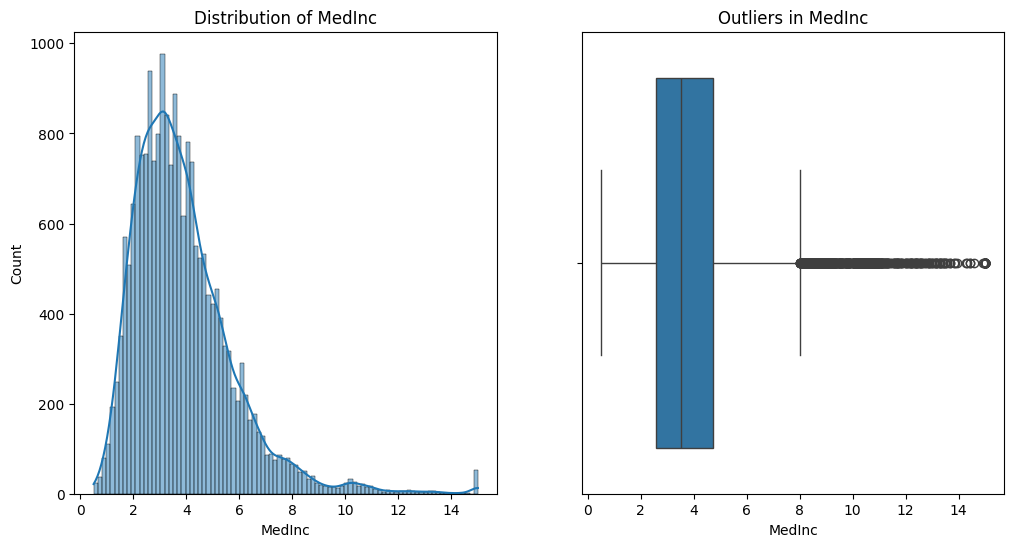

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


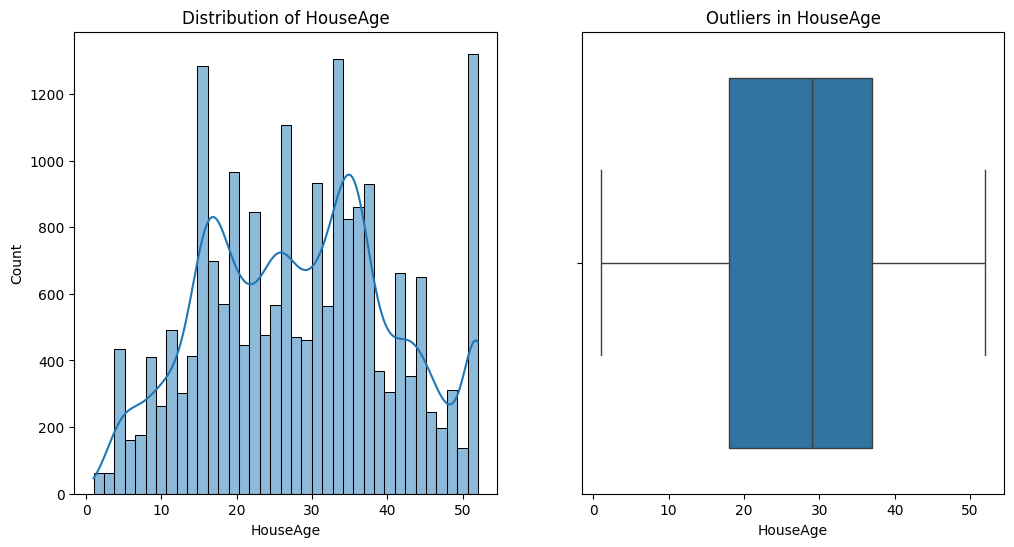

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


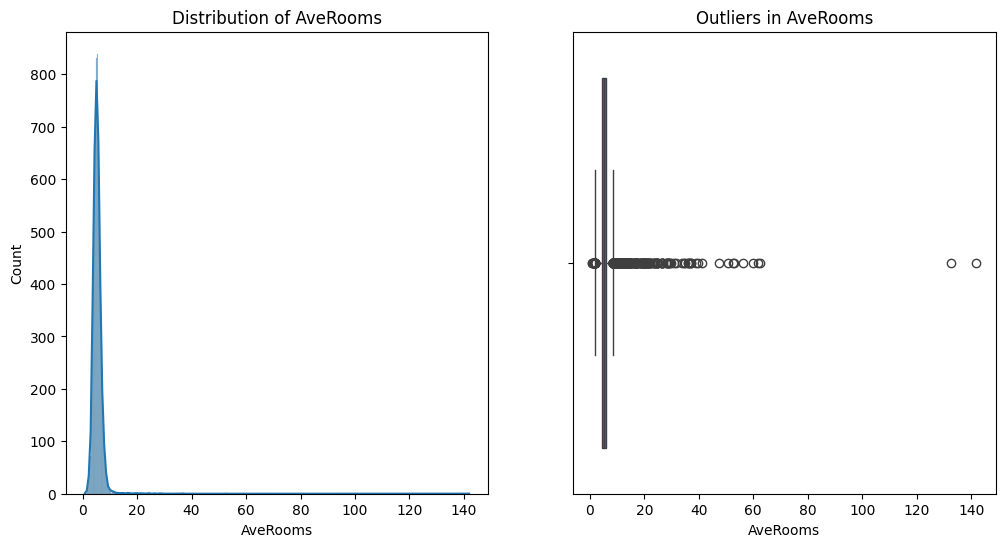

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


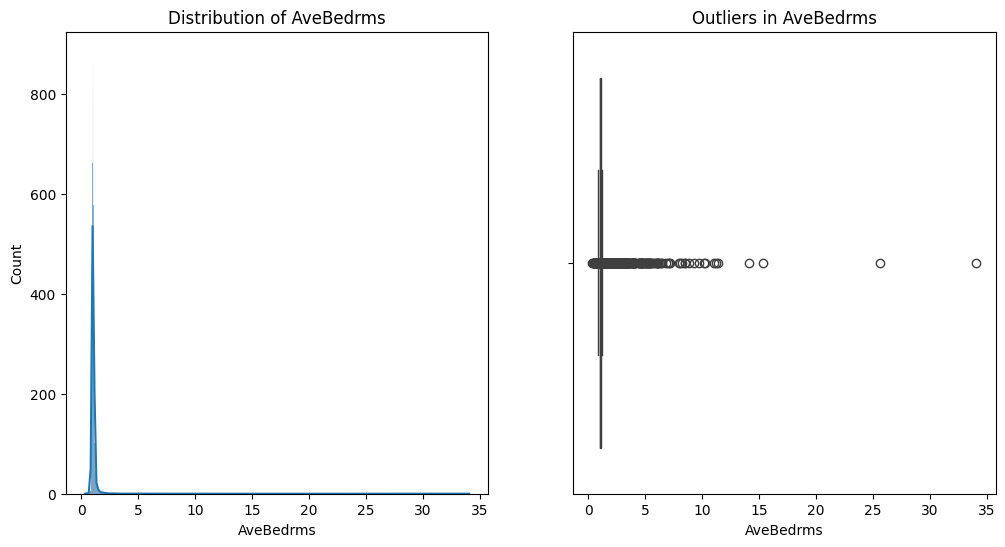

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


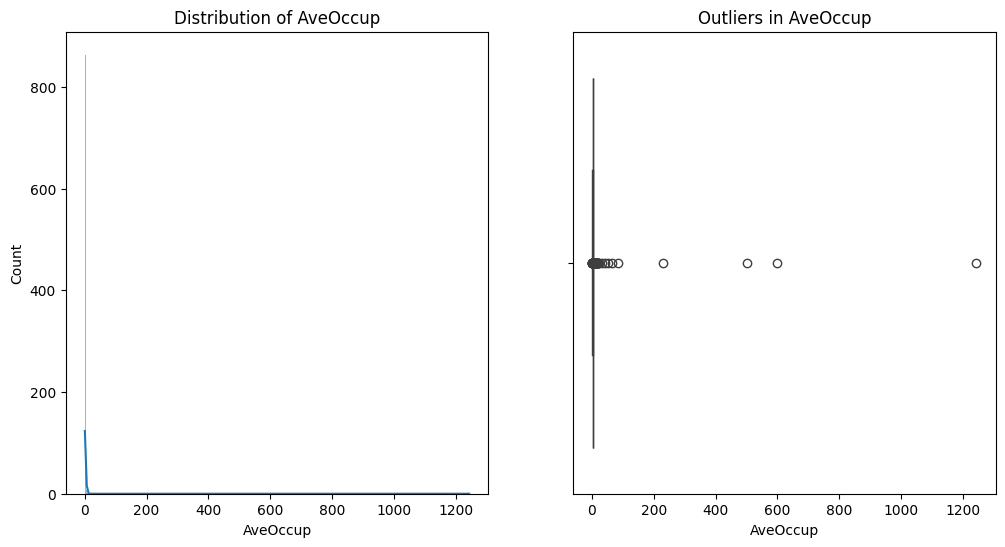

In [20]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek

# List of columns to check
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

# Loop over the columns to check
for column in columns_to_check:
    # Plot histogram for data distribution
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_california[column], kde=True)
    plt.title(f'Distribution of {column}')

    # Plot boxplot for outlier detection
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_california[column])
    plt.title(f'Outliers in {column}')
    plt.show()


### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali

c:\Users\rsn3584\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


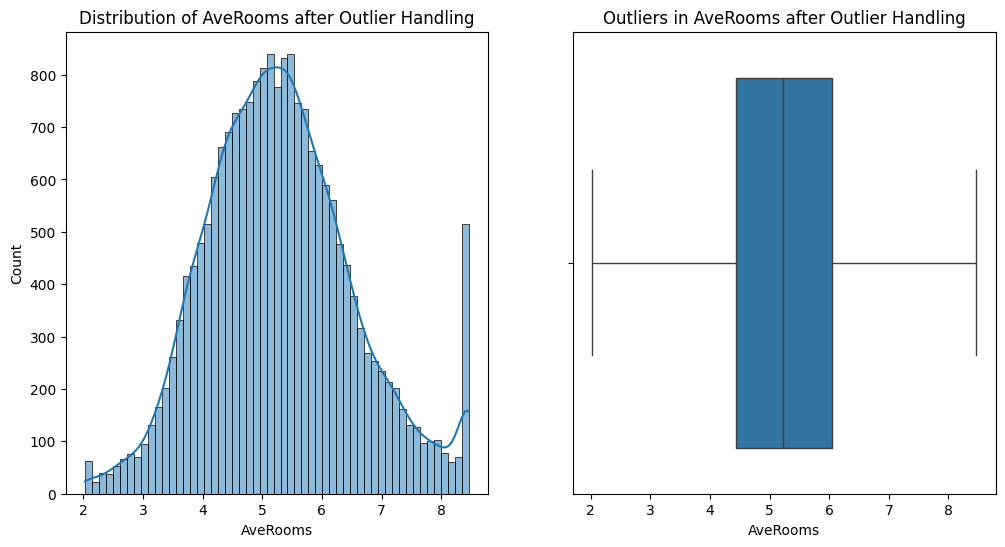

In [21]:
### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali
# Choose a column to handle
column_to_handle = 'AveRooms'

# Calculate Q1, Q3 and IQR
Q1 = df_california[column_to_handle].quantile(0.25)
Q3 = df_california[column_to_handle].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Handle outliers
df_california[column_to_handle] = df_california[column_to_handle].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

# Plot the distribution again
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df_california[column_to_handle], kde=True)
plt.title(f'Distribution of {column_to_handle} after Outlier Handling')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_california[column_to_handle])
plt.title(f'Outliers in {column_to_handle} after Outlier Handling')
plt.show()

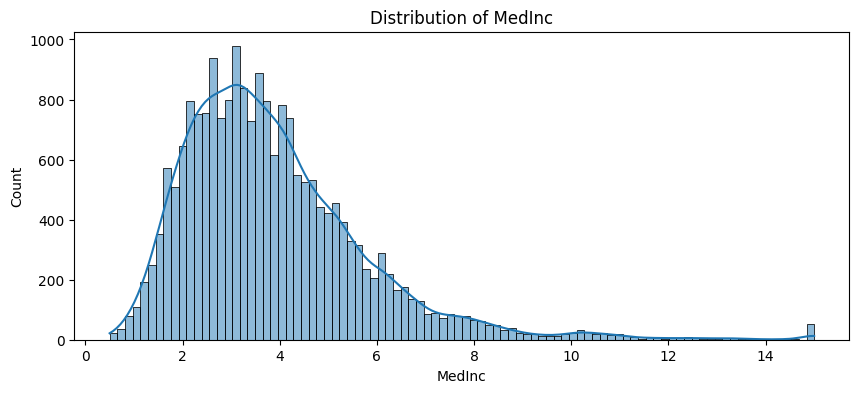

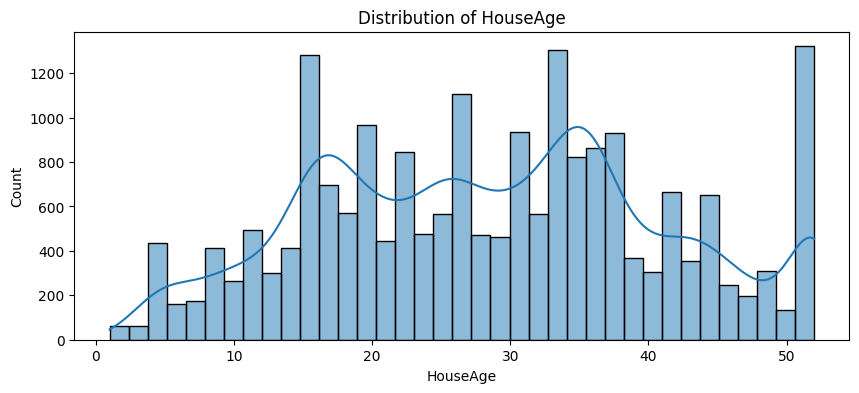

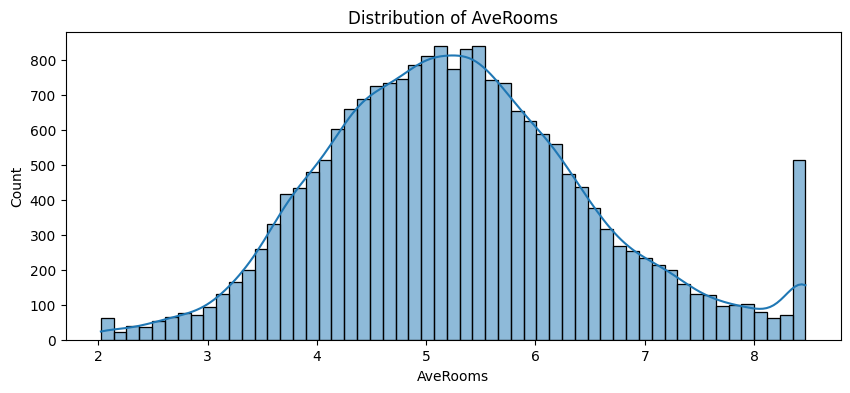

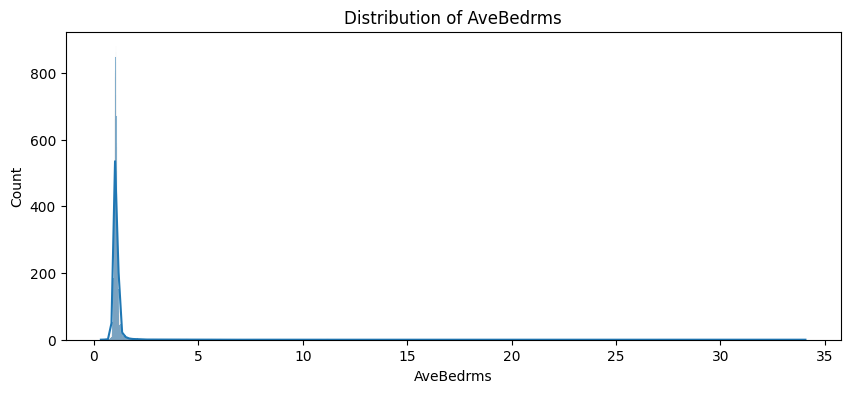

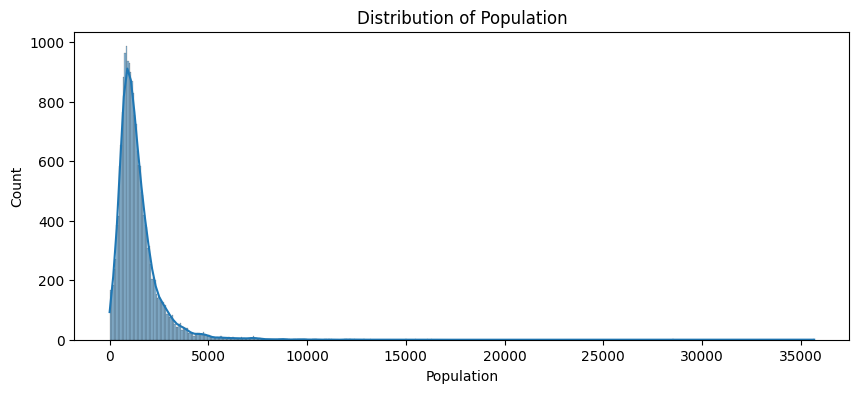

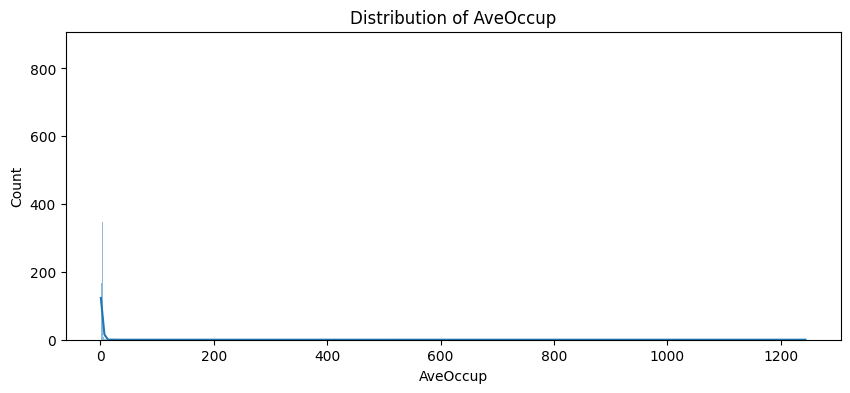

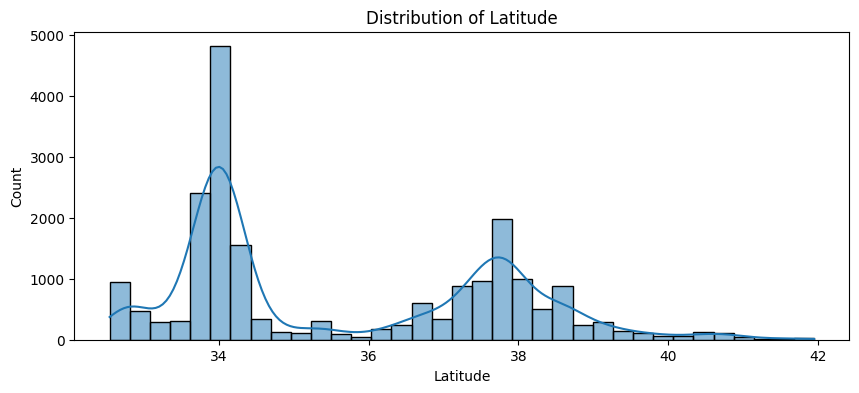

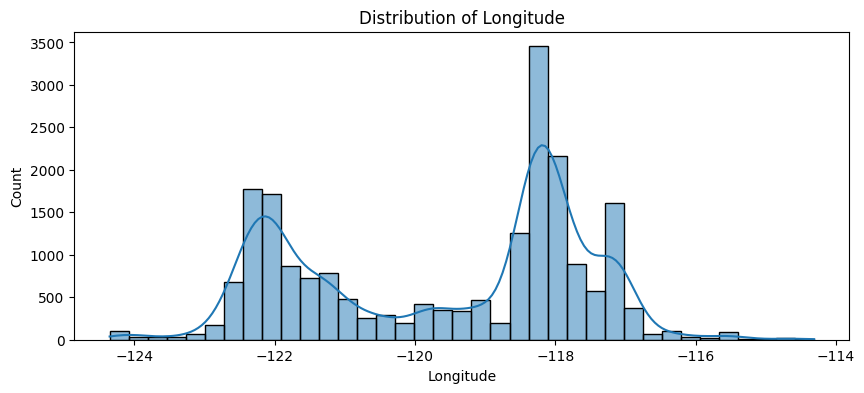

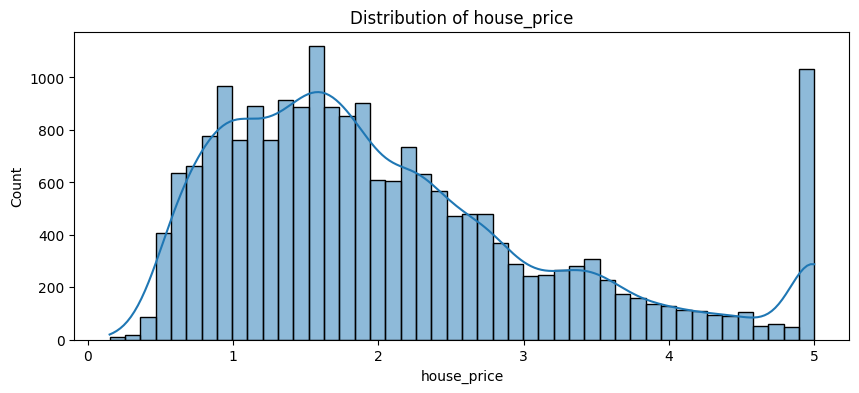

In [22]:
# Melakukan loop untuk mengecek distribusi tiap kolom
# Loop over the columns in the DataFrame
for column in df_california.columns:
    # Plot histogram for data distribution
    plt.figure(figsize=(10,4))
    sns.histplot(df_california[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [23]:
df_company = pd.read_csv('company.csv')

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [24]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu
df_company.head()
train_clfr, test_clfr = train_test_split(df_company, test_size = 0.2, random_state=42)

df_company.columns

#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

Index(['Revenue', 'Size', 'Rating', 'Headquarters'], dtype='object')

## Assignment 2. Missing Value Handling :
1. Cek persentase missing value pada kolom Headquarters di company.csv, Cek jenis missing valuenya ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?

In [25]:

# List of columns to check
columns_to_check = ['Revenue', 'Size', 'Rating', 'Headquarters']

# Loop over the columns to check
for column in columns_to_check:
    # Calculate the percentage of missing values
    missing_percentage = df_company[column].isnull().mean() * 100

    print(f'Percentage of missing values in {column}: {missing_percentage}%')

    # Check if the percentage of missing values is greater than 20%
    if missing_percentage > 20:
        # Drop the column
        df_company = df_company.drop(columns=[column])
        print(f"Dropped the '{column}' column due to high percentage of missing values.")
    else:
        # Fill missing values with the median for numerical columns and mode for categorical columns
        if df_company[column].dtype == 'object':
            df_company[column] = df_company[column].fillna(df_company[column].mode()[0])
            print(f"Filled missing values in '{column}' with the mode.")
        else:
            df_company[column] = df_company[column].fillna(df_company[column].median())
            print(f"Filled missing values in '{column}' with the median.")

Percentage of missing values in Revenue: 0.0%
Filled missing values in 'Revenue' with the mode.
Percentage of missing values in Size: 0.0%
Filled missing values in 'Size' with the mode.
Percentage of missing values in Rating: 0.0%
Filled missing values in 'Rating' with the median.
Percentage of missing values in Headquarters: 0.0%
Filled missing values in 'Headquarters' with the mode.


# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [30]:
df_churn = pd.read_csv('Telco-Customer-Churn.csv')

In [31]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu
df_churn.head()
train_clfr, test_clfr = train_test_split(df_churn, test_size = 0.2, random_state=42)

df_churn.columns

#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Assignment 3.a Label Encoder :

0. Lakukan label encoder pada 'Partner', 'Dependents' juga sama seperti yang telah dibahas dikelas
1. Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Notes : gunakan Telco-Customer-Churn.csv

In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
columns_to_encode = ['Partner', 'Dependents', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines']

# Replace 'No internet service' with 'No'
for column in columns_to_encode:
    df_churn[column] = df_churn[column].replace('No internet service', 'No')

# Perform label encoding
encoder = LabelEncoder()
for column in columns_to_encode:
    df_churn[column] = encoder.fit_transform(df_churn[column])

# Validate with value_counts
for column in columns_to_encode:
    print(df_churn[column].value_counts())

Partner
0    3641
1    3402
Name: count, dtype: int64
Dependents
0    4933
1    2110
Name: count, dtype: int64
StreamingMovies
0    4311
1    2732
Name: count, dtype: int64
StreamingTV
0    4336
1    2707
Name: count, dtype: int64
TechSupport
0    4999
1    2044
Name: count, dtype: int64
DeviceProtection
0    4621
1    2422
Name: count, dtype: int64
OnlineBackup
0    4614
1    2429
Name: count, dtype: int64
OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64
MultipleLines
0    3390
2    2971
1     682
Name: count, dtype: int64


## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [33]:
# Tulis jawaban
import pandas as pd

# Convert 'Churn' column to binary
df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})

# Calculate the mean 'Churn' rate for each category in the 'InternetService' column
mean_encode = df_churn.groupby('InternetService')['Churn'].mean()

# Replace each category in the 'InternetService' column with its corresponding mean 'Churn' rate
df_churn['InternetService'] = df_churn['InternetService'].map(mean_encode)

# Print the DataFrame to verify the result
print(df_churn)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
5     9305-CDSKC  Female              0        0           0       8   
6     1452-KIOVK    Male              0        0           1      22   
7     6713-OKOMC  Female              0        0           0      10   
8     7892-POOKP  Female              0        1           0      28   
9     6388-TABGU    Male              0        0           1      62   
10    9763-GRSKD    Male              0        1           1      13   
11    7469-LKBCI    Male              0        0           0      16   
12    8091-TTVAX    Male              0        1           0    

## Thank you :)